<a href="https://colab.research.google.com/github/she-lab/CI-CD_repository/blob/main/Hackathon_Platform_with_Tensorflow_used_for_abalone_dataset_to_build_a_sequential_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

In [14]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

df = pd.read_csv('abalone.zip', names=column_names)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
df.shape

(4177, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
WholeWeight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
ShuckedWeight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
VisceraWeight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
ShellWeight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [18]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
WholeWeight,0
ShuckedWeight,0
VisceraWeight,0
ShellWeight,0
Rings,0


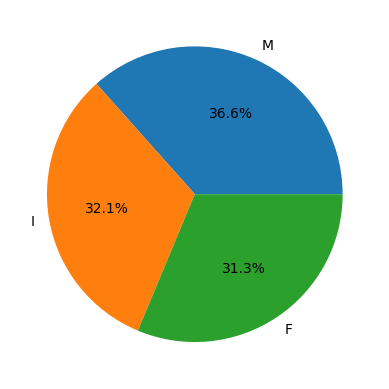

In [19]:
x = df['Sex'].value_counts()
labels = x.index
values = x.values
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%')
plt.show()

In [20]:
df.groupby('Sex').mean()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


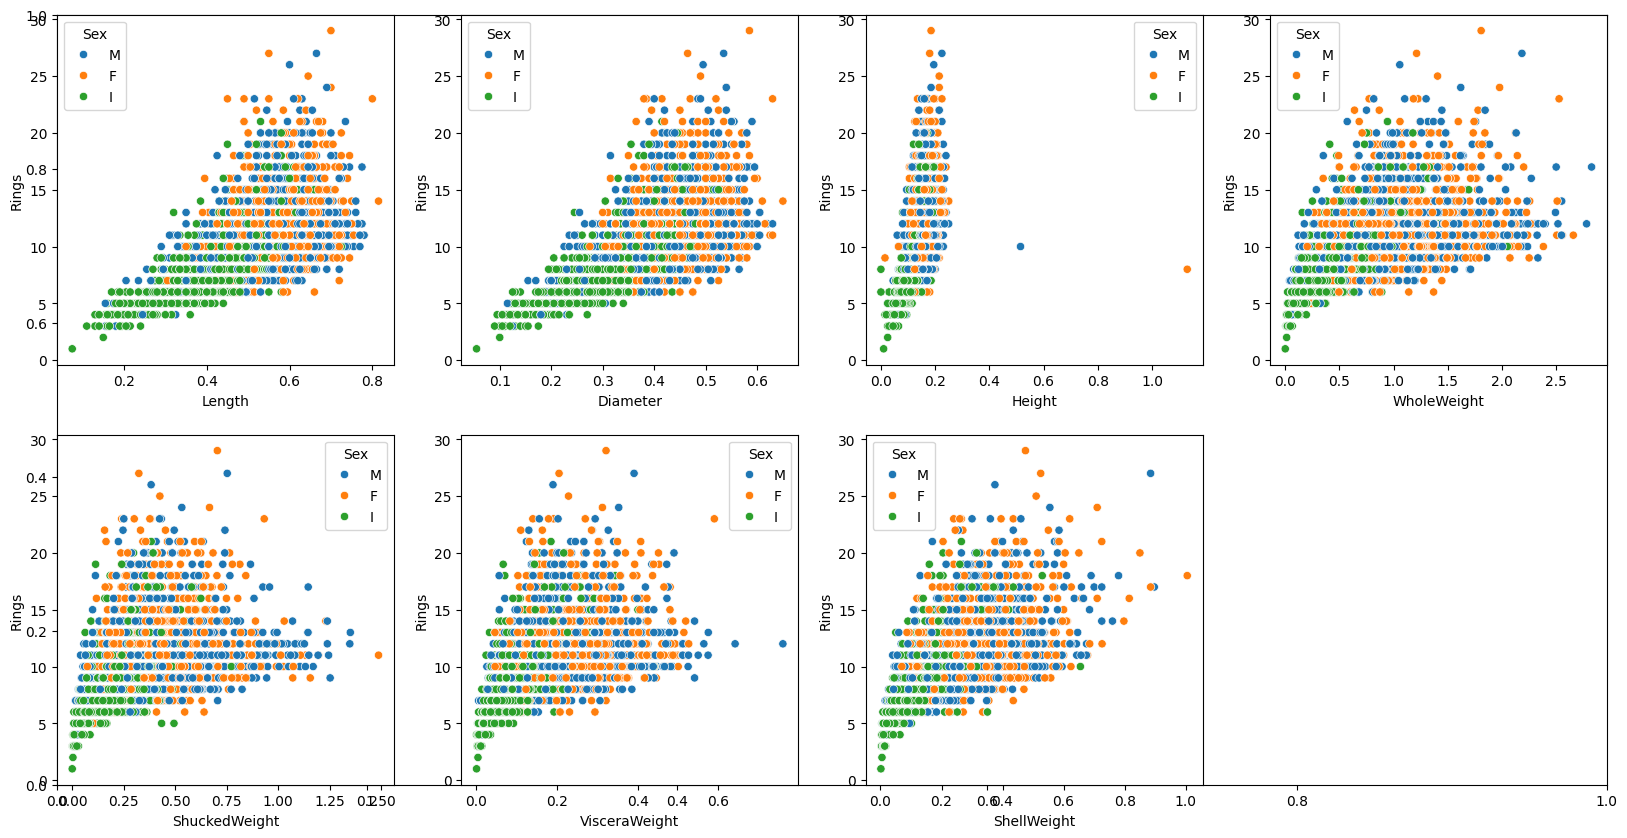

In [21]:
features = df.loc[:, 'Length':'ShellWeight'].columns

# Scatter plots
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 4, i+1)
    sb.scatterplot(data=df, x=feat, y='Rings', hue='Sex')

plt.show()

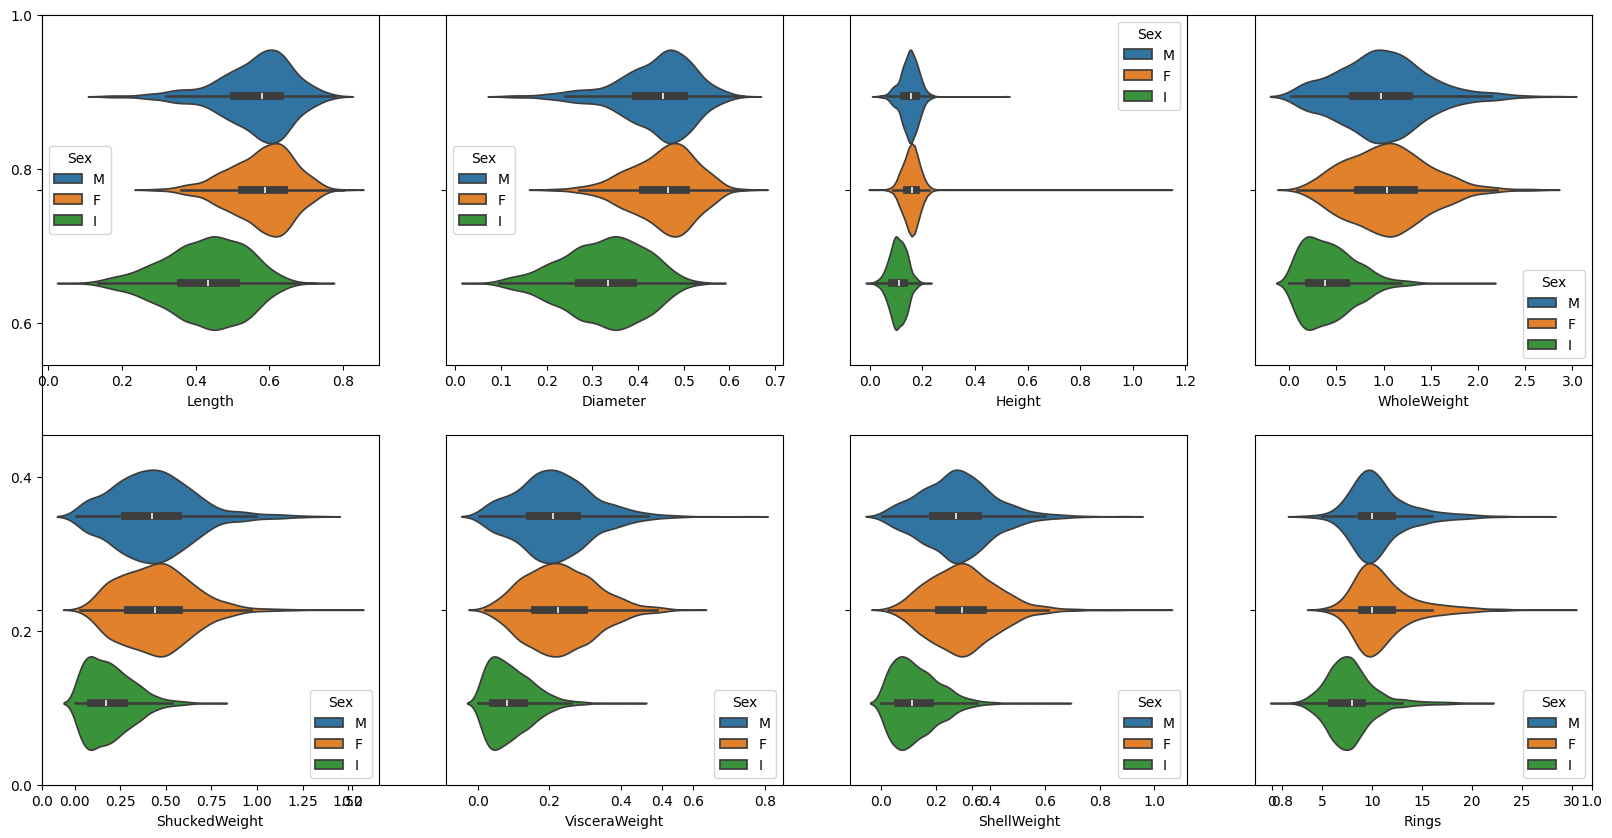

In [22]:
plt.subplots(figsize=(20, 10))
for i, feat in enumerate(features):
    plt.subplot(2, 4, i+1)
    sb.violinplot(data=df, x=feat, hue='Sex')

plt.subplot(2, 4, 8)
sb.violinplot(data=df, x='Rings', hue='Sex')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Features and target separation
features = df.drop('Rings', axis=1)
target = df['Rings']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=22)

# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((3341, 8), (836, 8))

In [25]:
# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='object').columns

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_val_scaled_numerical = scaler.transform(X_val[numerical_features])

# Convert scaled numerical features back to DataFrame
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_val_scaled_numerical = pd.DataFrame(X_val_scaled_numerical, columns=numerical_features, index=X_val.index)

# Handle categorical features (One-Hot Encoding)
X_train_categorical = pd.get_dummies(X_train[categorical_features])
X_val_categorical = pd.get_dummies(X_val[categorical_features])

# Align columns after one-hot encoding - crucial for consistent feature sets
X_train_categorical, X_val_categorical = X_train_categorical.align(X_val_categorical, join='inner', axis=1, fill_value=0)


# Combine scaled numerical and one-hot encoded categorical features
X_train_scaled = pd.concat([X_train_scaled_numerical, X_train_categorical], axis=1)
X_val_scaled = pd.concat([X_val_scaled_numerical, X_val_categorical], axis=1)

display(X_train_scaled.head())

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_F,Sex_I,Sex_M
3733,0.681388,0.478522,0.538193,0.607835,0.796161,0.854439,0.241956,False,False,True
3505,0.847941,0.881482,1.049562,0.525937,0.517358,0.680244,0.549545,False,False,True
3314,-0.609391,-0.528877,-0.612388,-0.790567,-0.785990,-0.658308,-0.905172,False,True,False
1888,0.348284,0.377782,-0.356703,0.012030,-0.198917,-0.011952,-0.054778,True,False,False
3484,-0.401201,0.125933,0.538193,-0.235710,-0.033448,-0.268661,-0.384079,False,True,False


In [26]:
model = Sequential()

model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,913 (277.00 KB)

 Trainable params: 69,889 (273.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,913 (277.00 KB)

 Trainable params: 69,889 (273.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [28]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_val_scaled, y_val))
loss, mae, mape = model.evaluate(X_val_scaled, y_val)
print(f"Validation Loss: {loss}, MAE: {mae}, MAPE: {mape}")

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 100.4448 - mae: 9.6419 - mape: 103.4523 - val_loss: 86.4200 - val_mae: 8.8124 - val_mape: 87.9154
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 76.5367 - mae: 8.3728 - mape: 89.3781 - val_loss: 53.1423 - val_mae: 6.7023 - val_mape: 65.0081
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.4066 - mae: 6.1039 - mape: 64.9993 - val_loss: 20.7191 - val_mae: 3.6814 - val_mape: 32.9524
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.0776 - mae: 3.5477 - mape: 36.0372 - val_loss: 9.1261 - val_mae: 2.0719 - val_mape: 19.4640
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8908 - mae: 2.3818 - mape: 24.9386 - val_loss: 6.8697 - val_mae: 1.8400 - val_mape: 19.4480
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3251 - mae: 2.2966 - mape: 24.6209 - val_loss: 6.0494 - val_mae: 1.7375 - val_mape: 17.9341
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.4506 - mae: 2.184

In [29]:
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,mae,mape,val_loss,val_mae,val_mape
0,94.928566,9.382627,100.779976,86.419998,8.812394,87.915352
1,69.426147,7.921406,84.696480,53.142345,6.702338,65.008102
2,37.720726,5.478295,57.583012,20.719082,3.681438,32.952358
3,15.350533,3.072888,31.572302,9.126125,2.071937,19.464001
4,9.463410,2.331544,24.398405,6.869739,1.840030,19.448040


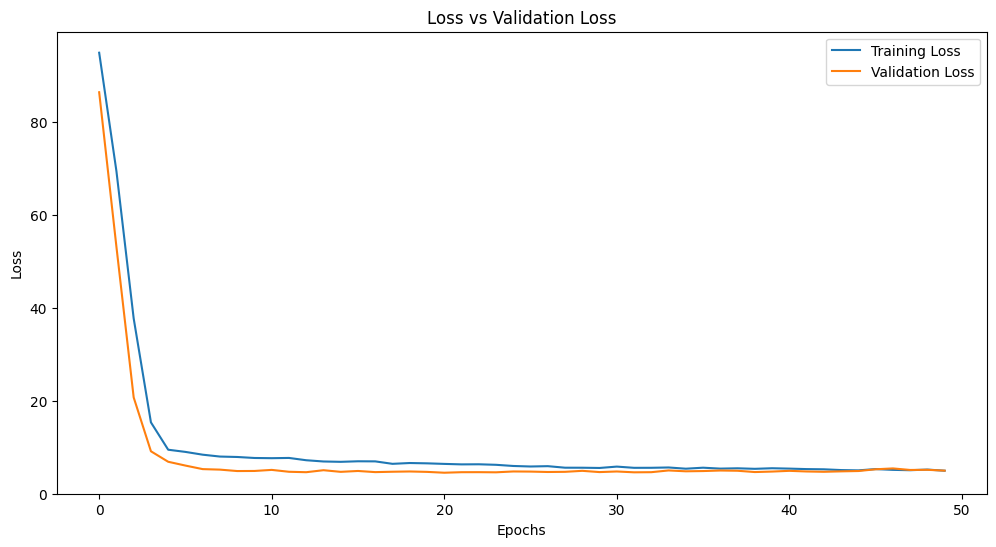

In [30]:
plt.figure(figsize=(12, 6))
hist_df['loss'].plot(label='Training Loss')
hist_df['val_loss'].plot(label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

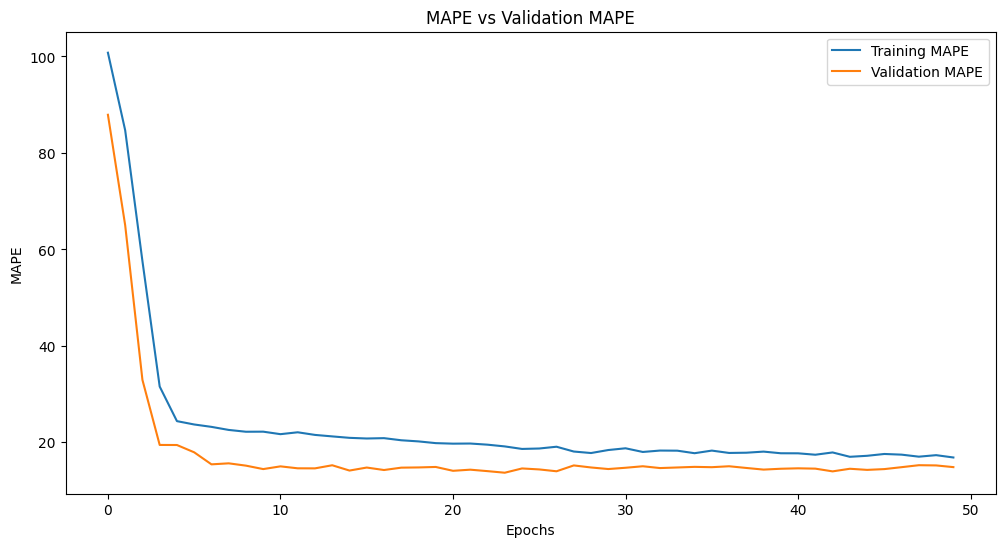

In [31]:
plt.figure(figsize=(12, 6))
hist_df['mape'].plot(label='Training MAPE')
hist_df['val_mape'].plot(label='Validation MAPE')
plt.title('MAPE vs Validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()